In [1]:
import pandas as pd
from collections import Counter
import networkx as nx

In [2]:
words = pd.read_csv('words.csv')

In [3]:
char = input("Enter the character name ")

Enter the character name Krishna


In [4]:
char_mention = pd.Series(words.loc[words['word'] == char].index)


char_assoc = pd.DataFrame()
for t in range(len(char_mention)):
    i = char_mention[t] - 5
    j = char_mention[t] - 5
    while True:
        if(j!=char_mention[t]):
            if(words.loc[j]['POS'] == 'PROPN'):
                hrk = words.loc[j]
                char_assoc = char_assoc.append(hrk)
                j=j+1
            else:
                j=j+1
        else:
            j = j+1
        if(j > i+10):
            break



In [5]:
finalDict={}
myList = char_assoc['lemma']
myDict = dict(Counter(myList))
myDict = {key:val for key, val in myDict.items() if val > 10}
for k,v in myDict.items():
    if len(k)!=1:
        if(k[0].isupper()):
            finalDict[k]=v
print(finalDict)

{'Dwaipayana': 44, 'Arjuna': 106, 'Vrishni': 13, 'Narada': 12, 'Duryodhana': 19, 'Karna': 16, 'Bhishma': 14, 'Yudhishthira': 41, 'Bhima': 27, 'Kesava': 13, 'Thou': 19, 'Pandavas': 23, 'Drupada': 17, 'Dhananjaya': 40, 'Vyasa': 14, 'Vasudeva': 12, 'Devaki': 17, 'Vaisampayana': 11, 'Kunti': 14, 'Hari': 12, 'Krishna': 29, 'Rama': 13, 'Partha': 57, 'Pandu': 33, 'Island': 34}


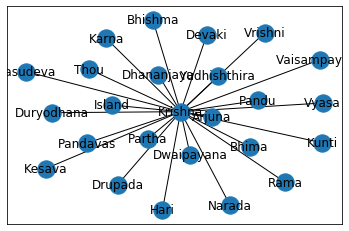

In [6]:
G_weighted = nx.Graph()
for k,v in finalDict.items():
    G_weighted.add_edge(char,k, weight=v)
nx.draw_networkx(G_weighted)